In [3]:
import numpy as np
import pandas as pd
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
columns_name = ["user_id","item_id", "rating","timestamp"]
df = pd.read_csv(r"C:\Users\LOKESH RATHI\Downloads\ml-100k\ml-100k\u.data", sep ='\t', names = columns_name)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df.shape

(100000, 4)

In [8]:
df['user_id'].nunique()

943

In [9]:
df['item_id'].nunique()

1682

In [10]:
movie_titles = pd.read_csv(r"C:\Users\LOKESH RATHI\Downloads\ml-100k\ml-100k\u.item", sep ="\|", header = None,encoding='ISO-8859-1')

In [11]:
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
movie_titles.shape

(1682, 24)

In [13]:
movie_titles = movie_titles[[0,1]]

In [14]:
movie_titles.columns = ['item_id','title']

In [15]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
df = pd.merge(df,movie_titles, on = "item_id")

In [17]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)
99999,12,203,3,879959583,Unforgiven (1992)


# EXPLORATORY DATA ANALYSIS

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [19]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [20]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
                            ... 
War at Home, The (1996)        1
Mirage (1995)                  1
Modern Affair, A (1995)        1
Dadetown (1995)                1
Yankee Zulu (1994)             1
Name: rating, Length: 1664, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [22]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [24]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,num of ratings
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3
They Made Me a Criminal (1939),5.0,1
...,...,...
Pharaoh's Army (1995),1.0,1
August (1996),1.0,1
Babyfever (1994),1.0,2


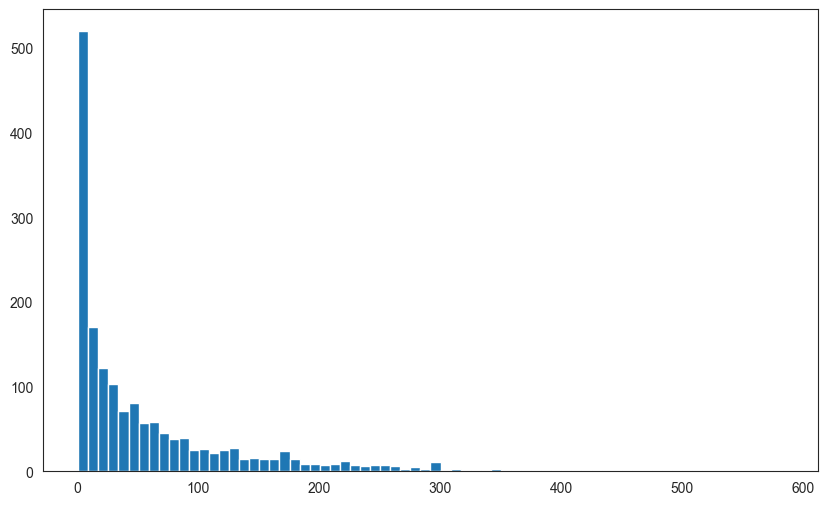

In [25]:
plt.figure(figsize =(10,6))
plt.hist(ratings['num of ratings'],bins = 70)
plt.show()

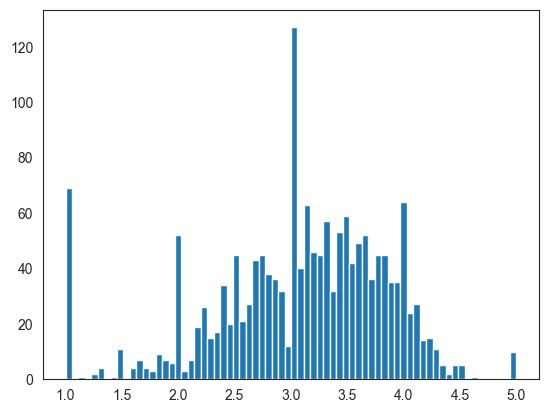

In [26]:
plt.hist(ratings['rating'], bins = 70)
plt.show()

In [27]:
import seaborn as sns

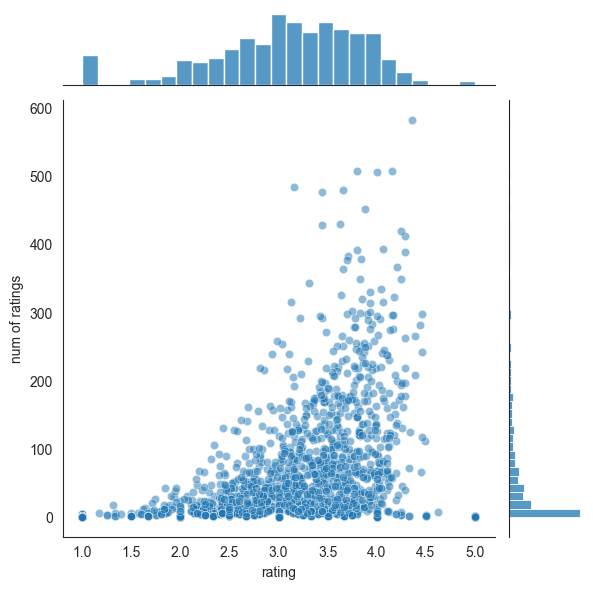

In [28]:
sns.jointplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)
plt.show()

# CREATING A MOVIE RECOMMENDATION

In [29]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [30]:
movie_mat = df.pivot_table(index = "user_id",  columns = "title", values = "rating")

In [31]:
ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [34]:
starwars_user_ratings = movie_mat['Star Wars (1977)']

In [37]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [41]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)

In [42]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [43]:
corr_starwars.sort_values('Correlation', ascending = False)

,Correlation
title,
Star Wars (1977),1.0
Stripes (1981),1.0
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
...,...
I Like It Like That (1994),-1.0
Crossfire (1947),-1.0
American Dream (1990),-1.0


In [44]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [47]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## PREDICTING FUNCTION

In [48]:
def predict_movies(movie_name):
    movie_user_rating = movie_mat[movie_name]
    similar_to_movie = movie_mat.corrwith(movie_user_rating)

    corr_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_movie.dropna(inplace = True)

    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending = False)
    
    return predictions

In [49]:
predictions = predict_movies("Titanic (1997)")
predictions.head()

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
